## Import packages

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import os
import math
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
import json
import shutil

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import model_selection
from IPython.display import display, HTML

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import binary_crossentropy, categorical_crossentropy
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
classes = ['diijam', 'baomoi', 'fptplay', 'iQIYI', 'bigo', 'myradio', 'spotify', 'nhaccuatui', 'soundcloud', 'sachnoiapp', 'phim247', 'popskid',
           'truyenaudiosachnoiviet', 'vieon', 'voizfm', 'tunefm', 'wetv', 'zingmp3', 'truyenaudio', 'baohay24h', 'freefire', 'among_us', 'azar', 'comico', 'nimotv',
           'mangatoon', 'medoctruyen', 'nhacvang', 'noveltoon', 'radiofm', 'tivi247', 'vtvgo', 'tivi24h', 'tinder', 'tinmoi24h', 'tivi360',
           'tiktok', 'linkedin', 'tiki', 'tinhte', 'lotus', 'tivi_truyentranh_webtoon', 'tuoitre_online', 'vietnamworks', 'wallstreet_journal', 'cnn_news', 'bbc_news',
           'twitter', 'weeboo', 'twitch', 'vnexpress', 'topcv', 'toc_chien', 'wesing', 'hago', 'google_meet', 'dubsmash', 'facebook',
           'hahalolo', 'zalo', 'hello_yo', 'dan_tri', 'zoom', 'wikipedia', 'instagram', 'jobway', 'kaka', 'pinterest', 'quora', 'lazada', 'chess', 'cake', 'mobile_legend', 'co_tuong_online',
           'ted', 'telegram', 'starmarker', 'skype', 'soha', 'tango', 'thanhnien', 'snapchat', 'tien_len', 'animal_restaurant', 'bida', 'cho_tot', 'messenger', 'netflix', 'nonolive', 'may',
           'podcast_player', 'pubg', 'partying', 'kenh14', 'lienquan_mobile', 'likee_lite', 'reddit', 'sendo', 'shopee', 'the_guardian', 'ola_party']

## Draw the distrbution of each feature

In [ ]:
# define the initial empty dataframe
cols = ['IP_port', 'complete_max', 'complete_min', 'complete_mean',
       'complete_mad', 'complete_std', 'complete_var', 'complete_skew',
       'complete_kurt', 'complete_pkt_num', 'complete_10per', 'complete_20per',
       'complete_30per', 'complete_40per', 'complete_50per', 'complete_60per',
       'complete_70per', 'complete_80per', 'complete_90per', 'out_max',
       'out_min', 'out_mean', 'out_mad', 'out_std', 'out_var', 'out_skew',
       'out_kurt', 'out_pkt_num', 'out_10per', 'out_20per', 'out_30per',
       'out_40per', 'out_50per', 'out_60per', 'out_70per', 'out_80per',
       'out_90per', 'in_max', 'in_min', 'in_mean', 'in_mad', 'in_std',
       'in_var', 'in_skew', 'in_kurt', 'in_pkt_num', 'in_10per', 'in_20per',
       'in_30per', 'in_40per', 'in_50per', 'in_60per', 'in_70per', 'in_80per',
       'in_90per', 'protocol', 'flows_num', 'flow_length_mean',
       'flow_pkt_num_mean', 'flow_duration_mean', 'ip1', 'ip2', 'ip3', 'ip4',
       'graph_id']

train_df = pd.DataFrame([], columns=cols)
test_df = pd.DataFrame([], columns=cols)
norm_train_df = pd.DataFrame([], columns=cols)
norm_test_df = pd.DataFrame([], columns=cols)
std_train_df = pd.DataFrame([], columns=cols)
std_test_df = pd.DataFrame([], columns=cols)

In [ ]:
# loop over train graphs
for app in classes:
  print(app)
  train_path = os.path.join('/content/drive/My Drive/AI PROJECTS/GNN/dataset/5_3/train_graphs/N10000/t10', app, 'features.csv')
  test_path = os.path.join('/content/drive/My Drive/AI PROJECTS/GNN/dataset/5_3/test_graphs/N10000/t10', app, 'features.csv')
  norm_train_path = os.path.join('/content/drive/My Drive/AI PROJECTS/GNN/dataset/5_3/norm_all_features_train_graphs/N10000/t10', app, 'features.csv')
  norm_test_path = os.path.join('/content/drive/My Drive/AI PROJECTS/GNN/dataset/5_3/norm_all_features_test_graphs/N10000/t10', app, 'features.csv')
  std_train_path = os.path.join('/content/drive/My Drive/AI PROJECTS/GNN/dataset/5_3/stand_train_graphs/N10000/t10', app, 'features.csv')
  std_test_path = os.path.join('/content/drive/My Drive/AI PROJECTS/GNN/dataset/5_3/stand_test_graphs/N10000/t10', app, 'features.csv')


  train_df_ = pd.read_csv(train_path, index_col=0)
  test_df_ = pd.read_csv(test_path, index_col=0)
  norm_train_df_ = pd.read_csv(norm_train_path, index_col=0)
  norm_test_df_ = pd.read_csv(norm_test_path, index_col=0)
  std_train_df_ = pd.read_csv(std_train_path, index_col=0)
  std_test_df_ = pd.read_csv(std_test_path, index_col=0)

  train_df = pd.concat([train_df, train_df_], axis=0)
  test_df = pd.concat([test_df, test_df_], axis=0)
  norm_train_df = pd.concat([norm_train_df, norm_train_df_], axis=0)
  norm_test_df = pd.concat([norm_test_df, norm_test_df_], axis=0)
  std_train_df = pd.concat([std_train_df, std_train_df_], axis=0)
  std_test_df = pd.concat([std_test_df, std_test_df_], axis=0)

diijam
baomoi
fptplay
iQIYI
bigo
myradio
spotify
nhaccuatui
soundcloud
sachnoiapp
phim247
popskid
truyenaudiosachnoiviet
vieon
voizfm
tunefm
wetv
zingmp3
truyenaudio
baohay24h
freefire
among_us
azar
comico
nimotv
mangatoon
medoctruyen
nhacvang
noveltoon
radiofm
tivi247
vtvgo
tivi24h
tinder
tinmoi24h
tivi360
tiktok
linkedin
tiki
tinhte
lotus
tivi_truyentranh_webtoon
tuoitre_online
vietnamworks
wallstreet_journal
cnn_news
bbc_news
twitter
weeboo
twitch
vnexpress
topcv
toc_chien
wesing
hago
google_meet
dubsmash
facebook
hahalolo
zalo
hello_yo
dan_tri
zoom
wikipedia
instagram
jobway
kaka
pinterest
quora
lazada
chess
cake
mobile_legend
co_tuong_online
ted
telegram
starmarker
skype
soha
tango
thanhnien
snapchat
tien_len
animal_restaurant
bida
cho_tot
messenger
netflix
nonolive
may
podcast_player
pubg
partying
kenh14
lienquan_mobile
likee_lite
reddit
sendo
shopee
the_guardian
ola_party


In [ ]:
features1_complete = ['complete_mean', 'complete_mad', 'complete_std', 'complete_var', 'complete_skew', 'complete_kurt', 'complete_pkt_num']
features1_out = ['out_mean', 'out_mad', 'out_std', 'out_var', 'out_skew', 'out_kurt', 'out_pkt_num']
features1_in = ['in_mean', 'in_mad', 'in_std', 'in_var', 'in_skew', 'in_kurt', 'in_pkt_num']
features1_flow = ['flows_num', 'flow_length_mean', 'flow_pkt_num_mean', 'flow_duration_mean']

In [ ]:
features2 = ['complete_max', 'complete_min', 'out_max', 'out_min', 'in_max', 'in_min']

In [ ]:
features3_complete = ['complete_10per', 'complete_20per', 'complete_30per', 'complete_40per', 'complete_50per', 'complete_60per', 'complete_70per', 'complete_80per', 'complete_90per']
features3_out = ['out_10per', 'out_20per', 'out_30per', 'out_40per', 'out_50per', 'out_60per', 'out_70per', 'out_80per', 'out_90per']
features3_in = ['in_10per', 'in_20per', 'in_30per', 'in_40per', 'in_50per', 'in_60per', 'in_70per', 'in_80per', 'in_90per']

In [ ]:
fig, ax = plt.subplots(figsize=(30, 20), ncols=2, nrows=3)

feature='in_var'
sns.histplot(train_df[feature], ax=ax[0][0])
sns.histplot(test_df[feature], ax=ax[0][1])
sns.histplot(norm_train_df[feature], ax=ax[1][0])
sns.histplot(norm_test_df[feature], ax=ax[1][1])
sns.histplot(std_train_df[feature], ax=ax[2][0])
sns.histplot(std_test_df[feature], ax=ax[2][1])

ax[0][0].set_title('Training dataset')
ax[0][1].set_title('Testing dataset')
ax[1][0].set_title('Training dataset after Normalization')
ax[1][1].set_title('Testing dataset after Normalization')
ax[2][0].set_title('Training dataset after Standardization')
ax[2][1].set_title('Testing dataset after Standardization')

fig.suptitle(feature, fontsize=20)


plt.show()

_____________________________________________________________________________

In [ ]:
features1_complete = ['complete_mean', 'complete_mad', 'complete_std', 'complete_var', 'complete_skew', 'complete_kurt', 'complete_pkt_num']
features1_out = ['out_mean', 'out_mad', 'out_std', 'out_var', 'out_skew', 'out_kurt', 'out_pkt_num']
features1_in = ['in_mean', 'in_mad', 'in_std', 'in_var', 'in_skew', 'in_kurt', 'in_pkt_num']
features1_flow = ['flows_num', 'flow_length_mean', 'flow_pkt_num_mean', 'flow_duration_mean']



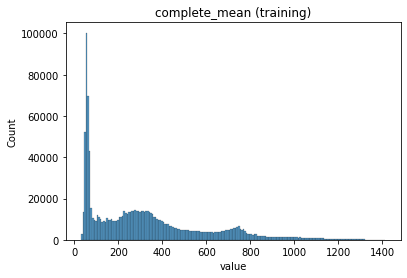

In [ ]:
sns.histplot(df['complete_mean'])

plt.xlabel('value')
plt.title('complete_mean (training)')

plt.show()

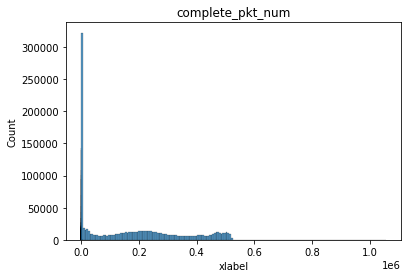

In [ ]:
for i in range(len(features)):
  sns.histplot(df[features[i]])

  plt.xlabel('value')
  plt.title(features[i])

plt.show()